<a href="https://colab.research.google.com/github/jaco-uoeo/ml-artefact/blob/main/Unit04/global_population.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Brief

Using tye supplied data undertake the following tasks.

**Task A: Correlation**

Pre-process the data - mean population of each country and mean per capita GDP (from 2001 to 2021) by making some arrangements for the missing values. Investigate any correlation between the mean population of each country and the mean per capita GDP (from 2001 to 2021). Very briefly, interpret the generated plot. Evaluate the Pearson Correlation Coefficient.


**Task B: Regression**

Perform linear regression, where the independent variable is the mean population of each country (from 2001 to 2021) and dependent variable is mean per capita GDP (from 2001 to 2021). Be prepared to discuss your agreed results during the seminar session.

In [32]:
# @title Dependencies

import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [6]:
# @title Load data

population = pd.read_csv("https://raw.githubusercontent.com/jaco-uoeo/ml-artefact/refs/heads/main/Unit04/Global_Population.csv")
gdp = pd.read_csv("https://raw.githubusercontent.com/jaco-uoeo/ml-artefact/refs/heads/main/Unit04/Global_GDP.csv")


## Data exploration

In [15]:
population.head()
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272 entries, 0 to 271
Data columns (total 66 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Country Name  269 non-null    object
 1   Country Code  267 non-null    object
 2   Series Name   267 non-null    object
 3   Series Code   267 non-null    object
 4   1960          267 non-null    object
 5   1961          267 non-null    object
 6   1962          267 non-null    object
 7   1963          267 non-null    object
 8   1964          267 non-null    object
 9   1965          267 non-null    object
 10  1966          267 non-null    object
 11  1967          267 non-null    object
 12  1968          267 non-null    object
 13  1969          267 non-null    object
 14  1970          267 non-null    object
 15  1971          267 non-null    object
 16  1972          267 non-null    object
 17  1973          267 non-null    object
 18  1974          267 non-null    object
 19  1975    

In [11]:
gdp.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.549721e+09,2.534637e+09,2.727850e+09,2.790849e+09,2.962905e+09,2.983637e+09,3.092430e+09,3.202189e+09,NaN,NaN
1,Africa Eastern and Southern,AFE,GDP (current US$),NY.GDP.MKTP.CD,1.929944e+10,1.970954e+10,2.147872e+10,2.571501e+10,2.351080e+10,2.679160e+10,...,9.427110e+11,9.498490e+11,9.635600e+11,9.837490e+11,9.186470e+11,8.720230e+11,9.842560e+11,1.011720e+12,1.008380e+12,9.188150e+11
2,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,1.780511e+10,1.990732e+10,2.014640e+10,2.049713e+10,1.913421e+10,1.811656e+10,1.875347e+10,1.805323e+10,1.879945e+10,2.011614e+10
3,Africa Western and Central,AFW,GDP (current US$),NY.GDP.MKTP.CD,1.040428e+10,1.112805e+10,1.194335e+10,1.267652e+10,1.383858e+10,1.486247e+10,...,6.709630e+11,7.275710e+11,8.207880e+11,8.514870e+11,7.607300e+11,6.905430e+11,6.837420e+11,7.416920e+11,7.945720e+11,7.845880e+11
4,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.117900e+11,1.280530e+11,1.367100e+11,1.457120e+11,1.161940e+11,1.011240e+11,1.221240e+11,1.013530e+11,8.941719e+10,5.837598e+10


In [22]:
# @title Data preparation

# get the columns that look like years in population
pop_years = [col for col in population.columns if col.isdigit() and 1900 <= int(col) <= 2100]
for year in pop_years:
    population[year] = pd.to_numeric(population[year], errors='coerce')


# do the same for gdp
gdp_years = [col for col in gdp.columns if col.isdigit() and 1900 <= int(col) <= 2100]
for year in gdp_years:
    gdp[year] = pd.to_numeric(gdp[year], errors='coerce')


# select only relevant columns
gdp_filtered = gdp[['Country Name', 'Country Code'] + gdp_years].copy()
pop_filtered = population[['Country Name', 'Country Code'] + pop_years].copy()


# handle missing values
gdp_filtered[gdp_years] = gdp_filtered[gdp_years].apply(lambda row: row.fillna(row.mean()), axis=1)
pop_filtered[pop_years] = pop_filtered[pop_years].apply(lambda row: row.fillna(row.mean()), axis=1)

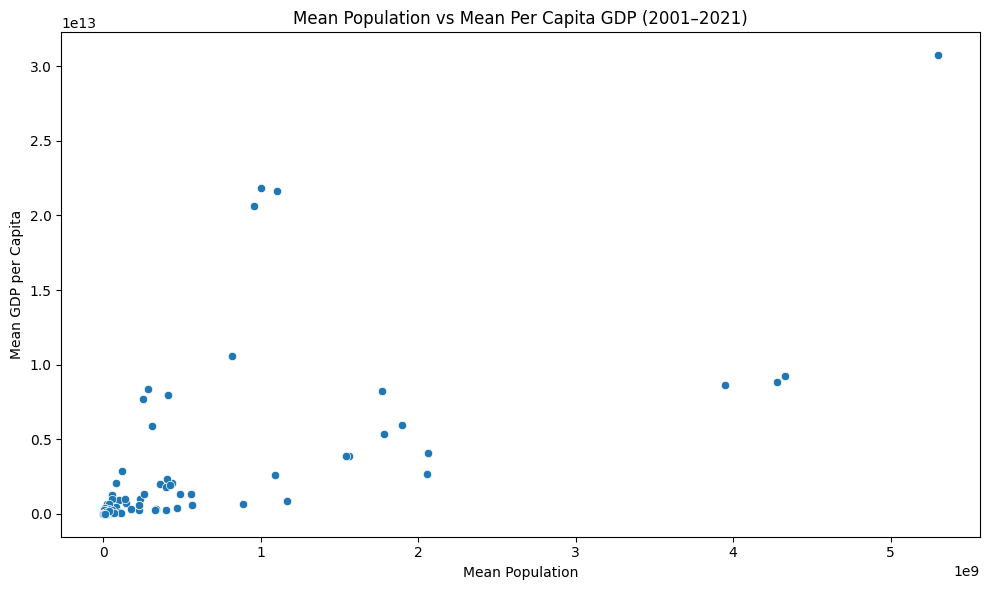

In [25]:
# @title Per Capita

# compute mean GDP per capita and mean population for each country
gdp_filtered['Mean_GDP_per_capita'] = gdp_filtered[years].mean(axis=1)
pop_filtered['Mean_Population'] = pop_filtered[years].mean(axis=1)

# merge the two datasets on country name
merged_df = pd.merge(gdp_filtered[['Country Name', 'Mean_GDP_per_capita']],
                     pop_filtered[['Country Name', 'Mean_Population']],
                     on='Country Name')

merged_df.dropna(inplace=True)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x='Mean_Population', y='Mean_GDP_per_capita')
plt.title('Mean Population vs Mean Per Capita GDP (2001–2021)')
plt.xlabel('Mean Population')
plt.ylabel('Mean GDP per Capita')
plt.tight_layout()
plt.show()

## Task A: Correlation

Pearson Correlation Coefficient: 0.695
P-value: 1.372e-38
This indicates a positive correlation between mean population and per capita GDP.


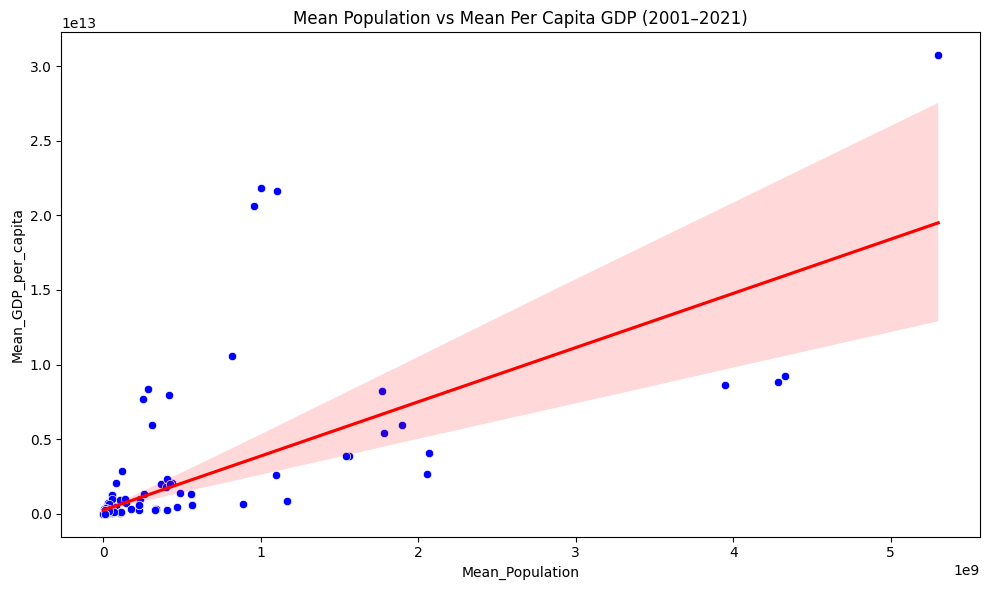

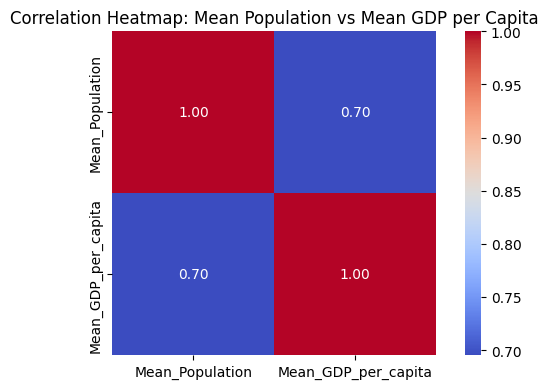

In [30]:
# @title Pearson Correlation Coefficient
corr_coef, p_value = pearsonr(merged_df['Mean_Population'], merged_df['Mean_GDP_per_capita'])
print(f'Pearson Correlation Coefficient: {corr_coef:.3f}')
print(f'P-value: {p_value:.3e}')

# Optional: Very brief interpretation
if corr_coef > 0:
    direction = 'positive'
elif corr_coef < 0:
    direction = 'negative'
else:
    direction = 'no'

print(f"This indicates a {direction} correlation between mean population and per capita GDP.")


# Plot the relationship using a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x='Mean_Population', y='Mean_GDP_per_capita', color='blue')
plt.title('Mean Population vs Mean Per Capita GDP (2001–2021)')
plt.xlabel('Mean Population (2001–2021)')
plt.ylabel('Mean Per Capita GDP (2001–2021)')

# Optionally, fit a regression line to the scatter plot
sns.regplot(data=merged_df, x='Mean_Population', y='Mean_GDP_per_capita', scatter=False, color='red')

plt.tight_layout()
plt.show()

# Select just the numeric columns for correlation (in this case, two)
corr_matrix = merged_df[['Mean_Population', 'Mean_GDP_per_capita']].corr()

# Plot the heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Heatmap: Mean Population vs Mean GDP per Capita')
plt.tight_layout()
plt.show()

### Interpretation

Pearson Correlation Coefficient: **0.695**

P-value: **1.372e-38**

This indicates a positive correlation between mean population and per capita GDP.

Based on the data, there appears to be a trend where countries with larger populations are more likely to have higher per capita GDPs. However, this relationship should be viewed as a pattern, not a direct cause-and-effect conclusion as there could be other factors that could explain this relationship.

## Task B: Regression

Mean Squared Error: 8191150744352118215278592.00
R² Score: 0.348
Intercept: 179471286424.76
Coefficient: 3455.829011


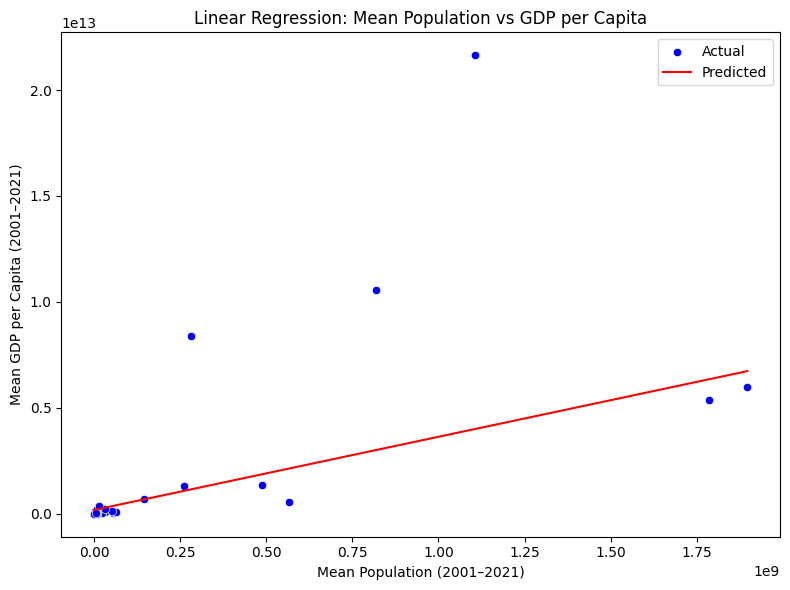

In [34]:
X = merged_df[['Mean_Population']]
y = merged_df['Mean_GDP_per_capita']

#split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# evaluate our model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.3f}")
print(f"Intercept: {model.intercept_:.2f}")
print(f"Coefficient: {model.coef_[0]:.6f}")

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_test.squeeze(), y=y_test, label='Actual', color='blue')
sns.lineplot(x=X_test.squeeze(), y=y_pred, label='Predicted', color='red')
plt.title('Linear Regression: Mean Population vs GDP per Capita')
plt.xlabel('Mean Population (2001–2021)')
plt.ylabel('Mean GDP per Capita (2001–2021)')
plt.tight_layout()
plt.legend()
plt.show()

### Interpretation

The model suggests a moderate link between a country's average population and its per capita GDP — with an R² score of 0.348, population explains around 35% of the variation in GDP per person.

The coefficient (~3455) means that, on average, countries with larger populations tend to have slightly higher GDP per capita.

The very large mean squared error tells us the model isn't great at making accurate predictions — possibly due to big differences between countries or outliers.